# OBJECTIVE
A research project to measure the impact of Clean Water and Sanitation on standard of living

## ABOUT DATASET
* Total official development assistance (gross disbursement) for water supply and sanitation, by recipient countries (millions of constant 2020 United States dollars).
* Population by country, available from 10,000 BCE to 2100 based on Gapminder data, HYDE, and UN Population Division (2022) estimates.
* GDP per capita based on purchasing power parity (PPP). PPP GDP is gross domestic product converted to international dollars using purchasing power parity rates.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

In [2]:
df_wat_san=pd.read_csv('water-and-sanitation.csv')
df_sup = pd.read_csv("total-oda-for-water-supply-and-sanitation-by-recipient (1).csv")
df_pop = pd.read_csv("population.csv")
df_gdp = pd.read_csv("gdp-per-capita-in-us-dollar-world-bank.csv")

The column name was changed in order to make it more practical in my work, as the column name was too long, with .rename

In [3]:
df_sup = df_sup.rename(columns={'6.a.1 - Total official development assistance (gross disbursement) for water supply and sanitation, by recipient countries (millions of constant 2020 United States dollars) - DC_TOF_WASHL': 'flow'})

"I don't need such a large dataset as the 'population.csv' file spans from 10000 BC to 2021. Since the dataset containing investment funds only goes from 2000 to 2020, I extracted those years from 'population.csv' and created a new CSV file called 'new_population.csv'

In [4]:
# Convert year column to integer
df_pop['Year'] = pd.to_numeric(df_pop['Year'], errors='coerce')

# Filter data between 2000 and 2020
df_pop_2000_to_2020 = df_pop[(df_pop['Year'] >= 2000) & (df_pop['Year'] <= 2020)]

df_pop_2000_to_2020.to_csv('new_population.csv', index=False)

In [5]:
df_new_pop = pd.read_csv("new_population.csv")

We are performing the process of merging the 'new_population' and investment files.

In [6]:
merged_df = pd.merge(df_new_pop, df_sup, on=['Entity', 'Year'])

The a/b ratio represents the investment/population for all countries. With this calculation, we can see the per capita aid fund.

In [7]:
all_countries = merged_df[['Entity', 'Year', 'Population (historical estimates)', 'flow']].groupby(['Entity', 'Year']).sum().reset_index()

In [8]:
a_b_list = []
for country in all_countries['Entity'].unique():
    country_data = all_countries[all_countries['Entity'] == country]
    for year in country_data['Year']:
        b = country_data[country_data['Year'] == year]['Population (historical estimates)'].values[0]
        a = country_data[country_data['Year'] == year]['flow'].values[0]
        a_b = a / b
        a_b_list.append({'Entity': country, 'Year': year, 'a_b_ratio': a_b})

a_b_df = pd.DataFrame(a_b_list)

In [9]:
a_b_df.to_csv("new_ratio.csv", index=False)

In [10]:
a_b_df_2 = pd.read_csv("new_ratio.csv")

We have created the a/b dataframe and converted it to a CSV file. Let's take a general overview of it.

In [11]:
a_b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993 entries, 0 to 2992
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Entity     2993 non-null   object 
 1   Year       2993 non-null   int64  
 2   a_b_ratio  2993 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 70.3+ KB


In [12]:
a_b_df.head(21)

,Entity,Year,a_b_ratio
0,Afghanistan,2000,0.237425
1,Afghanistan,2001,0.067044
2,Afghanistan,2002,0.629516
3,Afghanistan,2003,1.139759
4,Afghanistan,2004,1.778500
5,Afghanistan,2005,4.293112
6,Afghanistan,2006,2.488706
7,Afghanistan,2007,1.906320
8,Afghanistan,2008,3.689758
9,Afghanistan,2009,3.037395


In [13]:
# Minimum value of a_b_ratio column
min_value = a_b_df['a_b_ratio'].min()
print("Minimum a_b_ratio value:", min_value)

# Mean value of a_b_ratio column
mean_value = a_b_df['a_b_ratio'].mean()
print("Mean a_b_ratio value:", mean_value)

# Maximum value of a_b_ratio column
max_value = a_b_df['a_b_ratio'].max()
print("Maximum a_b_ratio value:", max_value)

Minimum a_b_ratio value: 0.0
Mean a_b_ratio value: 8.265309157417203
Maximum a_b_ratio value: 471.23015873015873


When creating the map, we performed the plotting process by taking the minimum value as the lower limit and average value as the upper limit in the numerical values of the color scale. The reason for taking the average value as the upper limit is to give meaning to the map within each range. If we had taken the maximum value as the upper limit, the a/b values would have been close to the lower and upper limits, resulting in insufficient distinct colors and rendering the map meaningless.

This way, we can visualize each range with its corresponding colors.

In [41]:
fig = px.choropleth(a_b_df, 
                    locations='Entity',             # Spatial coordinates
                    locationmode='country names',   # set of locations match entries in `locations`
                    color='a_b_ratio', 
                    animation_frame='Year',
                    color_continuous_scale=[[0, "rgb(166,206,227)"],
                [0.25, "rgb(31,120,180)"],
                [0.45, "rgb(178,223,138)"],
                [0.65, "rgb(51,160,44)"],
                [0.85, "rgb(251,154,153)"],
                [1, "rgb(227,26,28)"]],
                    range_color=(0, 8.26530),
                    title=' Total Official Development Assistance  vs. Population Ratio (2000-2020)')

fig.update_layout(
    geo=dict(
        projection_scale=3                          # determines the size of the geographical projection
    ),
    width=1200,
    height=650
)

fig.show()

## Relationship between "GDP" and "The Per Capita Aid Fund"

We are repeating the same process we did for the 'population.csv' file for the GDP data.

In [15]:
# Convert year column to integer
df_gdp['Year'] = pd.to_numeric(df_gdp['Year'], errors='coerce')

# Filter data between 2000 and 2020
df_gdp_2002_to_2020 = df_gdp[(df_gdp['Year'] >= 2000) & (df_pop['Year'] <= 2020)]

df_gdp_2002_to_2020.to_csv('new_gdp.csv', index=False)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4208\298074261.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_gdp_2002_to_2020 = df_gdp[(df_gdp['Year'] >= 2000) & (df_pop['Year'] <= 2020)]


In [16]:
df_new_gdp = pd.read_csv("new_gdp.csv")

In [17]:
df_new_gdp. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4535 entries, 0 to 4534
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Entity                              4535 non-null   object 
 1   Code                                4243 non-null   object 
 2   Year                                4535 non-null   int64  
 3   GDP per capita (constant 2015 US$)  4535 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 141.8+ KB


In [18]:
# Minimum value of a_b_ratio column
min_value = df_new_gdp['GDP per capita (constant 2015 US$)'].min()
print("Minimum GDP value:", min_value)

# Mean value of a_b_ratio column
mean_value = df_new_gdp['GDP per capita (constant 2015 US$)'].mean()
print("Mean GDP value:", mean_value)

# Maximum value of a_b_ratio column
max_value = df_new_gdp['GDP per capita (constant 2015 US$)'].max()
print("Maximum GDP value:", max_value)

Minimum GDP value: 258.6288146972656
Mean GDP value: 14758.864000859203
Maximum GDP value: 181709.34375


In [30]:
df_new_gdp_filtered = df_new_gdp.query('Year >= 2002 and Year <= 2020')
fig = px.choropleth(df_new_gdp_filtered, 
                    locations='Entity',             # Spatial coordinates
                    locationmode='country names',   # set of locations match entries in `locations`
                    color='GDP per capita (constant 2015 US$)', 
                    animation_frame='Year',
                    color_continuous_scale=[[0, "rgb(166,206,227)"],
                [0.25, "rgb(31,120,180)"],
                [0.45, "rgb(178,223,138)"],
                [0.65, "rgb(51,160,44)"],
                [0.85, "rgb(251,154,153)"],
                [1, "rgb(227,26,28)"]],
                    range_color=(0, 14758.864),
                    title='')

fig.update_layout(
    geo=dict(
        projection_scale=3                          # determines the size of the geographical projection
    ),
    width=1200,
    height=650
)

fig.show()

"I will merge the 'new_ratio' file with the 'new_gdp' file, and it will be easier to examine certain countries using a scatter plot.

In [35]:
merged_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2708 entries, 0 to 2707
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Entity                              2708 non-null   object 
 1   Year                                2708 non-null   int64  
 2   a_b_ratio                           2708 non-null   float64
 3   Code                                2708 non-null   object 
 4   GDP per capita (constant 2015 US$)  2708 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 126.9+ KB


<AxesSubplot: >

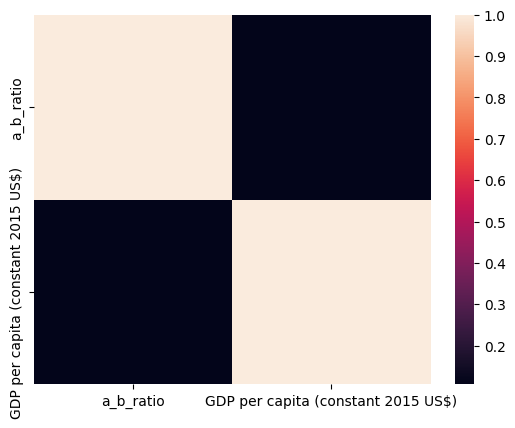

In [37]:
X=merged_df_2[['a_b_ratio','GDP per capita (constant 2015 US$)']]
sns.heatmap(X.corr())

Negative Correlation : a relationship between two variables such that as the value of one variable increases, the other decreases.

In [64]:
fig = px.scatter(merged_df_2, x="GDP per capita (constant 2015 US$)", y="a_b_ratio", color="Entity", hover_data=["Year"])
fig.show()

# Conclusion

* For every dollar invested in water and sanitation, there is a $4.3 return in the form of reduced health care costs for individuals and society around the world, where 2.5 billion people still lack access to basic sanitation services, with 1 billion practicing open defection, the United Nations World Health Organization (WHO) said today. 
(19 November 2014)

* Research by Vivid Economics for international NGO WaterAid has shown that each dollar invested in water, sanitation and hygiene (WASH) could generate up to a $21 return.(20 September 2021)